<a href="https://colab.research.google.com/github/Lanssser/inf2178-experimentaldesign-w24/blob/main/Assignment2/MINGLI_WANG_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF2178 Assignmeng 2 23 Winter Mingli Wang

## 1. Setup

In [47]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%pip install bioinfokit
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from google.colab import files
from scipy.stats import ttest_ind
from scipy.stats import shapiro, levene
%pip install pingouin
import pingouin as pg

In [48]:
#Please upload INF2178_A2_data.xlsx dataset from your local disk.
uploaded = files.upload()

Saving INF2178_A2_data.xlsx to INF2178_A2_data (1).xlsx


##2. Data Summary and EDA

In [49]:
#Read and load raw data
data = pd.read_excel('INF2178_A2_data.xlsx',sheet_name = 'ChildCareCentres', na_values = '..')
data.head(20)

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
5,6,1021,Centennial College Progress Campus Child Care ...,Non Profit Agency,941 PROGRESS AVE,M1G 3T8,24,Community College/University,Centennial College Of Applied Arts & Technology,10,20,32,0,0,62,Y,Y
6,7,1029,Air-O-Down Child Care Centre,Non Profit Agency,7 HAWKSDALE RD,M3K 1W3,6,Public High School,Downsview Secondary School,10,15,24,0,0,49,Y,Y
7,8,1031,Cedarbrae Day Nurseries (20 Greencrest),Commercial Agency,20 GREENCREST CIRCT,M1G 1B8,24,High Rise Apartment,Greencrest Property,0,0,16,0,30,46,Y,Y
8,9,1037,Tiago Avenue Community Child Care,Non Profit Agency,145 TIAGO AVE,M4B 2A6,19,Public Elementary School,Victoria Park Public School,0,0,21,0,30,51,Y,Y
9,10,1041,Ledbury Park Child Care Program,Non Profit Agency,95 FALKIRK ST,M5M 4K1,8,Public Elementary School,Ledbury Park Public School,0,0,24,39,90,153,Y,Y


In [50]:
# A summary overview of the data to check for missing values
summary = {
    "Total Rows": len(data),
    "Total Columns": len(data.columns),
    "Data Types": data.dtypes.to_dict(),
    "Missing Values": data.isnull().sum(),
    "Unique Values": data.nunique().to_dict(),
}

summary_df = pd.DataFrame.from_dict(summary, orient='index')
summary_df.columns = ['Value']
summary_df

,Value
Total Rows,1063
Total Columns,17
Data Types,"{'_id': int64, 'LOC_ID': int64, 'LOC_NAME': ob..."
Missing Values,_id 0 LOC_ID 0 LOC_NAME...
Unique Values,"{'_id': 1063, 'LOC_ID': 1063, 'LOC_NAME': 1058..."


In [51]:
# Statistic summary of capacities of childcare centres
columns_of_interest = ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE']
descriptive_stats = data[columns_of_interest].describe().round(decimals=1)
descriptive_stats.rename(columns={'IGSPACE': '0-18', 'TGSPACE': '18-30', 'PGSPACE': '30+', 'KGSPACE': 'Full-day', 'SGSPACE': 'Grade 1+', 'TOTSPACE': 'Total'}, inplace=True)
print(descriptive_stats)

         0-18   18-30     30+  Full-day  Grade 1+   Total
count  1063.0  1063.0  1063.0    1063.0    1063.0  1063.0
mean      3.9    11.6    24.3      14.3      21.7    75.7
std       6.1    12.1    18.6      20.5      30.4    47.8
min       0.0     0.0     0.0       0.0       0.0     6.0
25%       0.0     0.0    16.0       0.0       0.0    43.0
50%       0.0    10.0    24.0       0.0       0.0    62.0
75%      10.0    15.0    32.0      26.0      30.0    97.0
max      30.0    90.0   144.0     130.0     285.0   402.0


<ipython-input-52-de3ae5e19149>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.boxplot(x='variable', y='value', data=df_melted, showfliers=False).set_xticklabels(new_names)


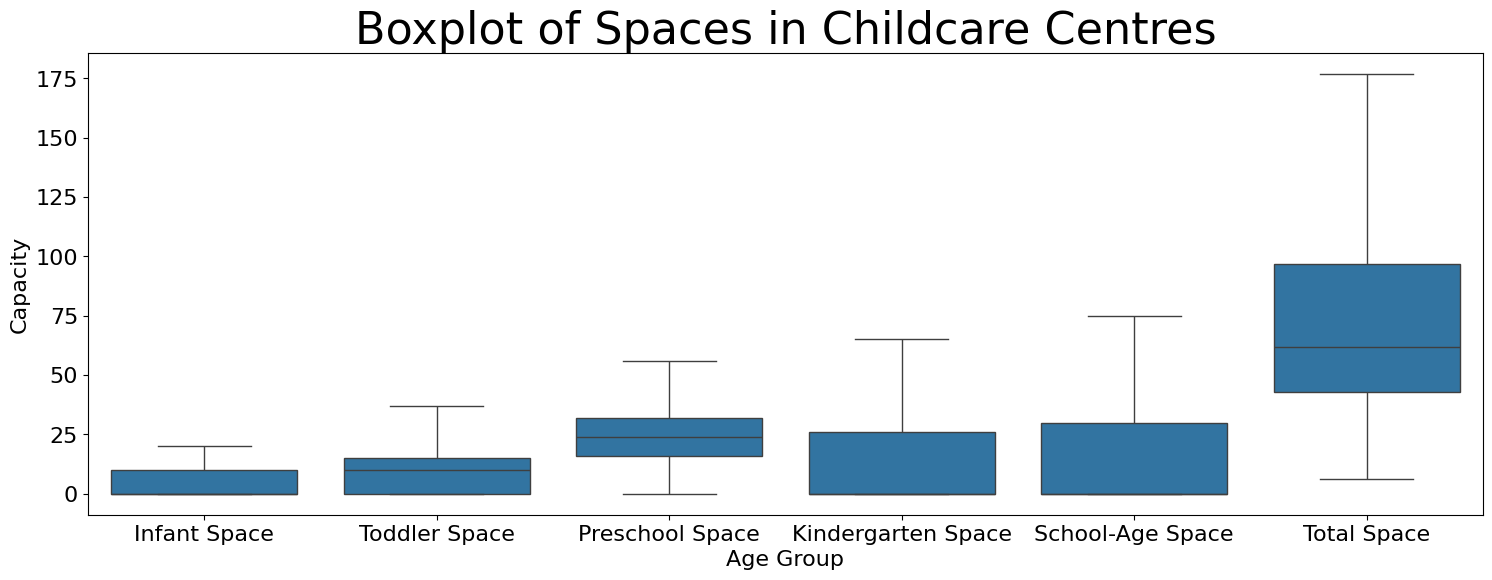

In [52]:
df_melted = data.melt(value_vars=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE'])
# Rename x ax lables to readable
new_names = ['Infant Space', 'Toddler Space', 'Preschool Space', 'Kindergarten Space', 'School-Age Space', 'Total Space']

# Plotting using seaborn
plt.figure(figsize=(18, 6))
sns.boxplot(x='variable', y='value', data=df_melted, showfliers=False).set_xticklabels(new_names)
plt.title('Boxplot of Spaces in Childcare Centres', fontsize = 32)
plt.xlabel('Age Group', fontsize = 16)
plt.ylabel('Capacity', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

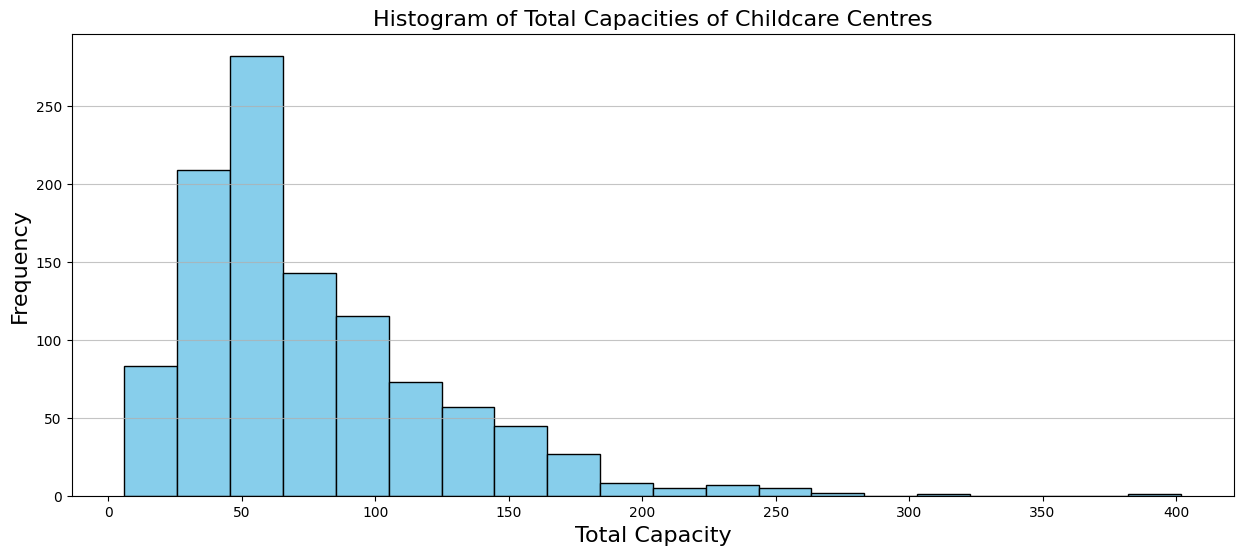

In [53]:
# Plotting Histogram of Total Capacities of Childcare Centres
plt.figure(figsize=(15, 6))
plt.hist(data['TOTSPACE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Capacities of Childcare Centres', fontsize = 16)
plt.xlabel('Total Capacity', fontsize =16)
plt.ylabel('Frequency', fontsize =16)
plt.grid(axis='y', alpha=0.75)
plt.show()

##3. Total Space and Auspice

###3.1 One-Way ANOVA Test

<ipython-input-54-21fdf7b07e97>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.countplot(x='AUSPICE', data=data, ax=axes[0]).set_xticklabels(xticks_names)
<ipython-input-54-21fdf7b07e97>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.boxplot(x='AUSPICE', y='TOTSPACE', data=data, ax=axes[1], showfliers=False).set_xticklabels(xticks_names)


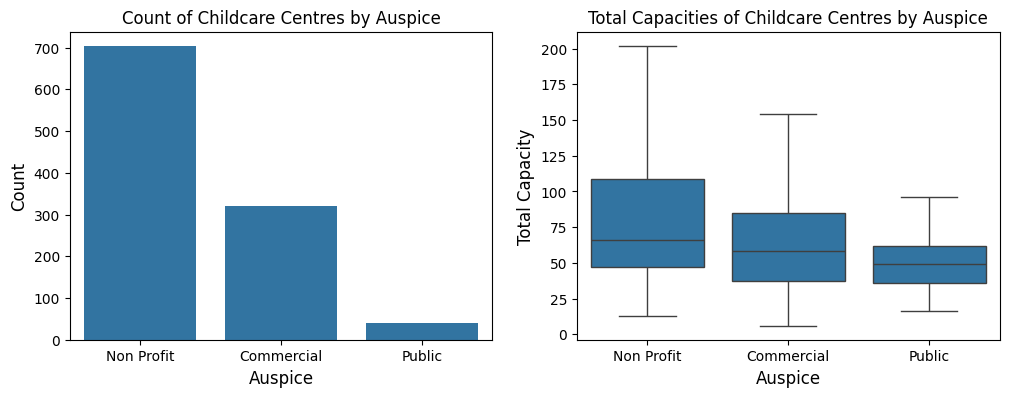

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
xticks_names = ['Non Profit', 'Commercial', 'Public']
# First plot: bar plot showing the count of childcare centres under each auspice
sns.countplot(x='AUSPICE', data=data, ax=axes[0]).set_xticklabels(xticks_names)
axes[0].set_title('Count of Childcare Centres by Auspice')
axes[0].set_xlabel('Auspice', fontsize = 12)
axes[0].set_ylabel('Count', fontsize = 12)

# Second plot: boxplot showing the total capacities of childcare centres against auspice
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=data, ax=axes[1], showfliers=False).set_xticklabels(xticks_names)
axes[1].set_title('Total Capacities of Childcare Centres by Auspice')
axes[1].set_xlabel('Auspice', fontsize = 12)
axes[1].set_ylabel('Total Capacity', fontsize = 12)

plt.show()

In [55]:
model = ols('TOTSPACE ~ C(AUSPICE)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


In [56]:
# One-Way ANOVA
res = stat()
res.anova_stat(df=data, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [57]:
#Post hoc Test
res = stat()
res.tukey_hsd(df=data, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.806538,3.993722,29.619353,4.356853,0.006071
1,Non Profit Agency,Public (City Operated) Agency,36.177966,8.673910,63.682022,4.369046,0.005901
2,Commercial Agency,Public (City Operated) Agency,19.371429,-10.141900,48.884757,2.180132,0.272554


###3.2 Assumption Checks

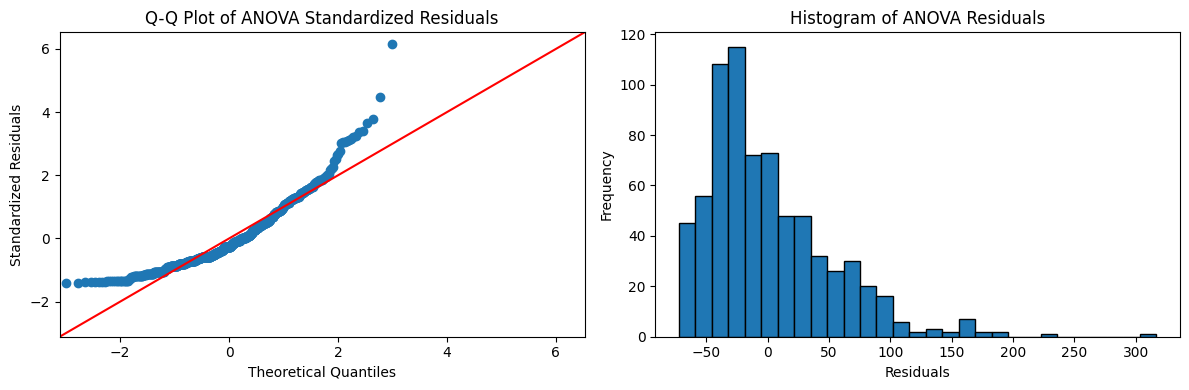

In [58]:
#checking model diagnostics
# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Q-Q plot on the first subplot
sm.qqplot(res.anova_std_residuals, line='45', ax=axes[0])
axes[0].set_xlabel("Theoretical Quantiles")
axes[0].set_ylabel("Standardized Residuals")
axes[0].set_title("Q-Q Plot of ANOVA Standardized Residuals")

# Histogram
axes[1].hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel('Frequency')
axes[1].set_title("Histogram of ANOVA Residuals")

plt.tight_layout()
plt.show()

In [59]:
# Checking Assumption 1: Residuals have a normal distribution
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [60]:
# Checking Assumption 2: Levene's test when the sample is not normally distributed
res.levene(df=data, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),9.1994
1,Degrees of freedom (Df),2.0000
2,p value,0.0001


In [61]:
# Welch's ANOVA on total capacities against Auspice, because the assumption of homogeneity failed.
res = stat()
res.welch_anova_results = pg.welch_anova(dv='TOTSPACE', between='AUSPICE', data=data)
res.welch_anova_results

,Source,ddof1,ddof2,F,p-unc,np2
0,AUSPICE,2,142.886068,51.632039,1.331760e-17,0.039582


## 4. Two-Way ANOVA

### 4.1 Perfrom the Two-way ANOVA

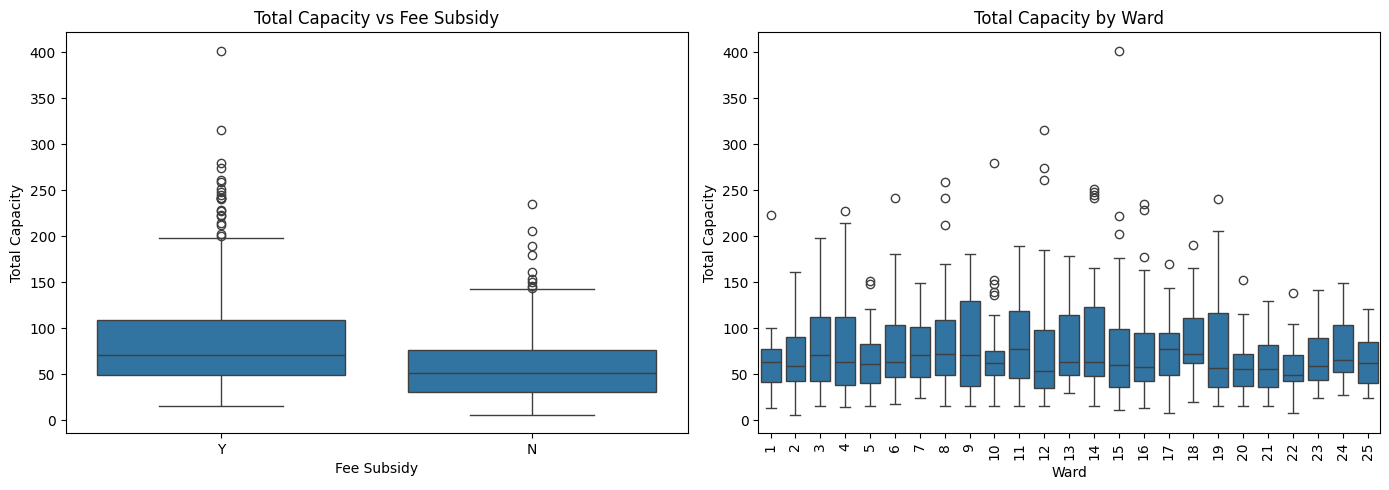

In [62]:
# Setting up the figure for the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# First plot: Total capacity of childcare centers against whether if they receive fee subsidy
sns.boxplot(x='subsidy', y='TOTSPACE', data=data, ax=axes[0])
axes[0].set_title('Total Capacity vs Fee Subsidy')
axes[0].set_xlabel('Fee Subsidy')
axes[0].set_ylabel('Total Capacity')

# Second plot: Total capacity against their corresponding wards
sns.boxplot(x='ward', y='TOTSPACE', data=data, ax=axes[1])
axes[1].set_title('Total Capacity by Ward')
axes[1].set_xlabel('Ward')
axes[1].set_ylabel('Total Capacity')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [63]:
# Building the OLS model
ward_and_subsidy = ols('TOTSPACE ~ C(ward) * C(subsidy)', data=data).fit()
anova_result_2way = sm.stats.anova_lm(ward_and_subsidy, typ=2)
print(anova_result_2way)

                          sum_sq      df           F        PR(>F)
C(ward)             1.456853e+05    24.0    2.976229  2.371216e-06
C(subsidy)          2.278527e+05     1.0  111.716131  7.667219e-25
C(ward):C(subsidy)  5.564400e+04    24.0    1.136760  2.946505e-01
Residual            2.066083e+06  1013.0         NaN           NaN


In [64]:
# Perform the two way ANOVA
res = stat()
res.anova_stat(df=data, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(subsidy) + C(ward) + C(subsidy):C(ward)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(subsidy),1.0,2.278527e+05,227852.673275,111.716131,7.667219e-25
C(ward),24.0,1.456853e+05,6070.222681,2.976229,2.371216e-06
C(subsidy):C(ward),24.0,5.564400e+04,2318.500143,1.136760,2.946505e-01
Residual,1013.0,2.066083e+06,2039.568251,NaN,NaN


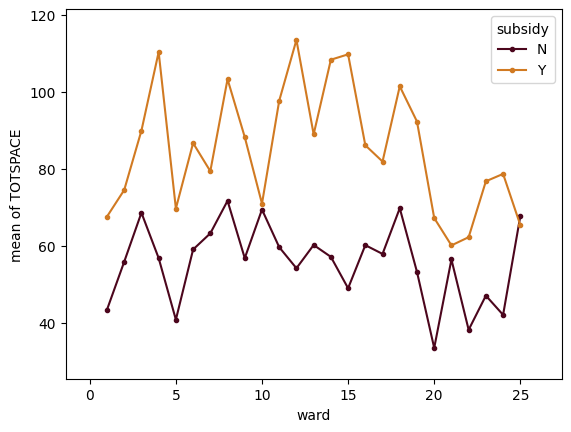

In [65]:
# Interaction plot between fee subsidy and ward
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x=data['ward'], trace=data['subsidy'], response=data['TOTSPACE'],colors=['#4c061d','#d17a22'])
plt.show()

In [66]:
# post hoc test for fee subsidy
res.tukey_hsd(df=data, res_var='TOTSPACE',xfac_var='subsidy',anova_model='TOTSPACE ~ C(ward) + C(subsidy) + C(ward):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 23
  w

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,34.121178,25.106267,43.136089,10.510313,0.001


In [67]:
# post hoc test for ward
res.tukey_hsd(df=data, res_var='TOTSPACE',xfac_var='ward',anova_model='TOTSPACE ~ C(ward) + C(subsidy) + C(ward):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,3,8,15.234286,-26.895062,57.363633,1.878732,0.900000
1,3,25,14.646667,-31.765941,61.059275,1.639571,0.900000
2,3,24,2.730000,-44.492662,49.952662,0.300358,0.900000
3,3,6,8.500000,-35.219690,52.219690,1.010111,0.900000
4,3,19,10.343529,-29.331443,50.018501,1.354502,0.900000
...,...,...,...,...,...,...,...
295,7,16,16.924765,-33.538599,67.388129,1.742504,0.900000
296,7,20,8.894545,-43.281244,61.070335,0.885691,0.900000
297,22,16,35.517241,-11.355186,82.389669,3.936853,0.474866
298,22,20,9.697931,-39.013325,58.409187,1.034373,0.900000


In [68]:
# post hoc test for fee subsidy and ward
res.tukey_hsd(df=data, res_var='TOTSPACE',xfac_var=['subsidy','ward'], anova_model='TOTSPACE ~ C(ward) + C(subsidy) + C(ward):C(subsidy)')
res.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Y, 3)","(Y, 8)",17.671429,-37.787241,73.130098,1.807935,0.9
1,"(Y, 3)","(Y, 25)",27.800000,-28.468328,84.068328,2.803247,0.9
2,"(Y, 3)","(Y, 24)",14.650000,-41.618328,70.918328,1.477251,0.9
3,"(Y, 3)","(Y, 6)",1.508696,-52.512976,55.530367,0.158458,0.9
4,"(Y, 3)","(Y, 19)",10.766667,-40.940358,62.473691,1.181442,0.9


##4.2 Checking assumptions

In [69]:
# Checking Assumption 1: Residuals have a normal distribution
w, pvalue = shapiro(ward_and_subsidy.resid)
print('Shapiro-Wilk Test for Normality: W-Value={}, P-Value={}'.format(w, pvalue))

Shapiro-Wilk Test for Normality: W-Value=0.9351233839988708, P-Value=4.285875996920474e-21


In [70]:
# Checking Assumption 2:  check for homogeneity with Levene's test when the sample is not normally distributed
grouped_by_ward = data.groupby('ward')['TOTSPACE'].apply(list)
grouped_by_subsidy = data.groupby('subsidy')['TOTSPACE'].apply(list)

# Perform Levene's test across wards
stat_ward, p_ward = levene(*grouped_by_ward)
print(f"Levene's test for ward: Statistic={stat_ward}, p-value={p_ward}")

# Perform Levene's test across subsidy statuses
stat_subsidy, p_subsidy = levene(*grouped_by_subsidy)
print(f"Levene's test for subsidy: Statistic={stat_subsidy}, p-value={p_subsidy}")

Levene's test for ward: Statistic=2.4771349242742535, p-value=0.0001064029256778597
Levene's test for subsidy: Statistic=22.988879302520136, p-value=1.8617545516099655e-06
